In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
raw_data = pd.read_csv("movies.csv")
raw_data.head()

,id,genre,production_company,production_country,release_date,runtime,languages,title,vote_average,vote_count
0,3,Drama,Villealfa Filmproductions,Finland,1986-10-17,72,svenska,Shadows in Paradise,7.4,105
1,9991,Comedy,SKA Films,United Kingdom,2001-12-26,99,English,Mean Machine,6.2,324
2,11,Adventure,Lucasfilm,United States of America,1977-05-25,121,English,Star Wars,8.2,13353
3,12,Animation,Pixar,United States of America,2003-05-30,100,English,Finding Nemo,7.8,13279
4,14,Drama,Jinks/Cohen Company,United States of America,1999-09-15,122,English,American Beauty,8.0,7771


In [4]:
movie_country_list = raw_data.production_country.value_counts()

In [5]:
movie_country_list = pd.DataFrame(movie_country_list)

In [6]:
movie_country_list.head()

,production_country
United States of America,703
United Kingdom,112
Germany,57
France,55
Canada,23


In [7]:
movie_country_list.reset_index(inplace=True)
movie_country_list.head()

,index,production_country
0,United States of America,703
1,United Kingdom,112
2,Germany,57
3,France,55
4,Canada,23


In [8]:
movie_country_list.rename(columns = {'index':'Country', 
                                    'production_country': 'no_of_movies'
                                   }, 
                         inplace = True)
movie_country_list.head()

,Country,no_of_movies
0,United States of America,703
1,United Kingdom,112
2,Germany,57
3,France,55
4,Canada,23


In [9]:
movie_country_list.Country.unique()

array(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Canada', 'Japan', 'Australia', 'Italy', 'Spain', 'New Zealand',
       'Ireland', 'Denmark', 'Sweden', 'Netherlands', 'Finland',
       'Czech Republic', 'Hong Kong', 'China', 'Mexico', 'Austria',
       'Argentina', 'Fiji', 'South Korea', 'Ecuador', 'Estonia', 'Brazil',
       'Peru', 'Israel', 'Switzerland', 'Uganda', 'Russia', 'Luxembourg',
       'Bulgaria', 'Thailand', 'India', 'Kazakhstan', 'Bahamas'],
      dtype=object)

In [10]:
movie_country_list.Country.unique().shape

(37,)

In [11]:
shape_file = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
shape_file.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
shape_file.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null int64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [13]:
shape_file.drop(['pop_est', 'continent', 'gdp_md_est'
                ], 
                axis=1, inplace=True)
shape_file.rename(columns = {'name':'Country', 
                            'iso_a3': 'Country_code'
                             }, 
                         inplace = True)
shape_file.head()

,Country,Country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [16]:
antarctica_loc = shape_file.loc[shape_file.Country == 'Antarctica']
antarctica_loc.index.unique()

Int64Index([159], dtype='int64')

In [17]:
shape_file.loc[shape_file.Country == 'Antarctica']

,Country,Country_code,geometry
159,Antarctica,ATA,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [18]:
shape_file.drop(shape_file.index[[159]], inplace=True)

In [19]:
shape_file.loc[shape_file.Country == 'Antarctica']

IndexError: too many indices for array

Empty GeoDataFrame
Columns: [Country, Country_code, geometry]
Index: []

In [20]:
shape_file.reset_index(drop=True, inplace=True)

In [21]:
shape_file.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
Country         176 non-null object
Country_code    176 non-null object
geometry        176 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 4.2+ KB


In [22]:
shape_file.Country.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [23]:
shape_file.Country.unique().shape

(176,)

In [24]:
merged_data = pd.merge(shape_file, movie_country_list, how='left', left_on='Country', right_on='Country')
merged_data.head()

,Country,Country_code,geometry,no_of_movies
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.0
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",23.0
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",703.0


In [25]:
merged_data.Country.unique().shape

(176,)

In [26]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 4 columns):
Country         176 non-null object
Country_code    176 non-null object
geometry        176 non-null geometry
no_of_movies    35 non-null float64
dtypes: float64(1), geometry(1), object(2)
memory usage: 6.9+ KB


In [27]:
merged_data['no_of_movies'] = merged_data['no_of_movies'].fillna(0)
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 4 columns):
Country         176 non-null object
Country_code    176 non-null object
geometry        176 non-null geometry
no_of_movies    176 non-null float64
dtypes: float64(1), geometry(1), object(2)
memory usage: 6.9+ KB


In [28]:
geometry = merged_data.geometry
crs = {'init': 'epsg:4326'}
gpd_merged_data = gpd.GeoDataFrame(merged_data, crs=crs, geometry=geometry)

In [29]:
gpd_merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 4 columns):
Country         176 non-null object
Country_code    176 non-null object
geometry        176 non-null geometry
no_of_movies    176 non-null float64
dtypes: float64(1), geometry(1), object(2)
memory usage: 6.9+ KB


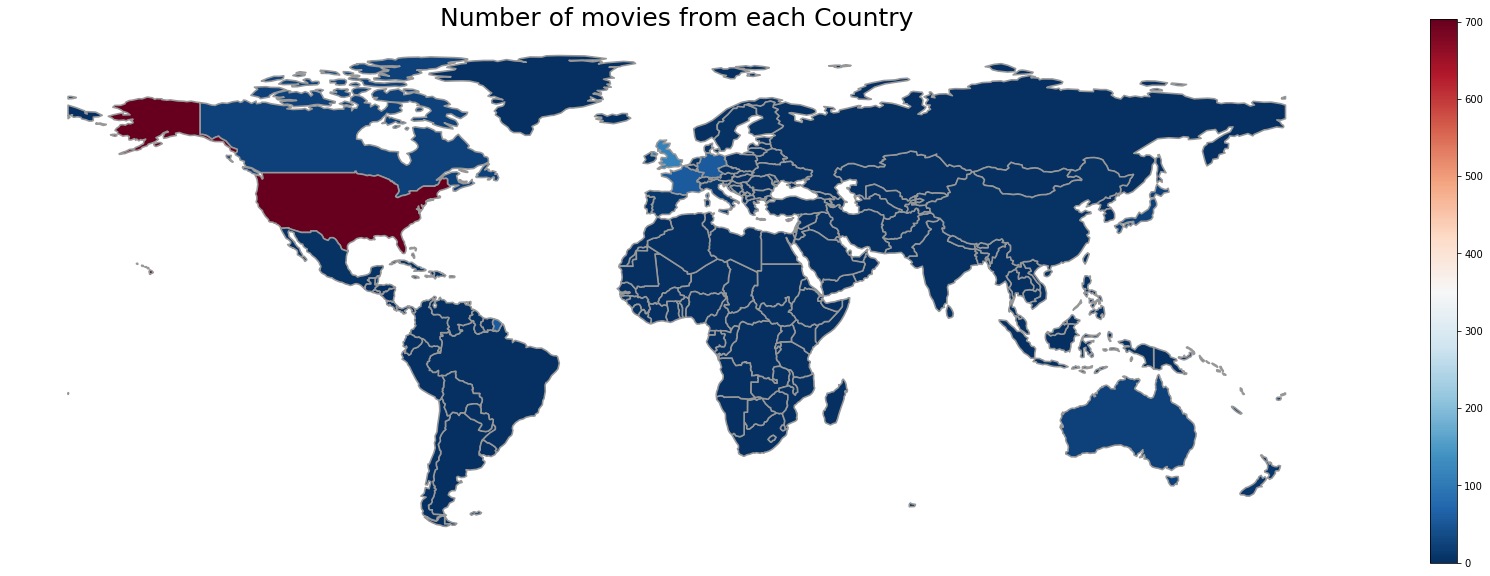

In [42]:
# set the value column that will be visualised
variable = 'no_of_movies'
# set the range for the choropleth values
vmin, vmax = gpd_merged_data.no_of_movies.min(), gpd_merged_data.no_of_movies.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Number of movies from each Country', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array(10) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommend it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
gpd_merged_data.plot(column=variable, cmap='RdBu_r', linewidth=1.6, ax=ax, edgecolor='1.6');
fig.savefig('no_of_movies_map.png', dpi=300)